# <ins>Anuran Calls (MFCCs) Data Set</ins>

Data Set Characteristics:Multivariate | Number of Instances:7195 | Area:Life | Attribute Characteristics:Real | Number of Attributes:22 | Date Donated:2017-02-24 | Associated Tasks:Classification, Clustering | Missing Values= N/A


**Data Set Information:**

This dataset was used in several classifications tasks related to the challenge of anuran species recognition through their calls. It is a multilabel dataset with three columns of labels. This dataset was created segmenting 60 audio records belonging to 4 different families, 8 genus, and 10 species. Each audio corresponds to one specimen (an individual frog), the record ID is also included as an extra column. We used the spectral entropy and a binary cluster method to detect audio frames belonging to each syllable. The segmentation and feature extraction were carried out in Matlab. After the segmentation we got 7195 syllables, which became instances for train and test the classifier. These records were collected in situ under real noise conditions (the background sound). Some species are from the campus of Federal University of Amazonas, Manaus, others from Mata AtlÃ¢ntica, Brazil, and one of them from CÃ³rdoba, Argentina. The recordings were stored in wav format with 44.1kHz of sampling frequency and 32bit of resolution, which allows us to analyze signals up to 22kHz. From every extracted syllable 22 MFCCs were calculated by using 44 triangular filters.


**Attribute Information:**

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an mel-frequency cepstrum (MFC). Due to each syllable has different length, every row (i) was normalized acording to MFCCs_i/(max(abs(MFCCs_i))).

In [11]:
library("mltools")
library("data.table")
library("glmnet")

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1


In [46]:
setwd("C:/IE582")
Dataset_4<-read.csv("Frogs_MFCCs.csv",sep = ",", dec = ".")
Dataset_4 <- Dataset_4[,-26] #dropping ID column
Dataset_4$Family<-as.factor(Dataset_4$Family)
Dataset_4$Genus<-as.factor(Dataset_4$Genus)
Dataset_4$Species<-as.factor(Dataset_4$Species)
set.seed(168)
# selecting 75% of data as sample from total 'n' rows of the data  
sample <- sample.int(n = nrow(Dataset_4), size = floor(.75*nrow(Dataset_4)), replace = F)
Dataset_4_train <- Dataset_4[sample, ]
Dataset_4_test  <- Dataset_4[-sample, ]
str(Dataset_4)

'data.frame':	7195 obs. of  25 variables:
 $ MFCCs_.1: num  1 1 1 1 1 1 1 1 1 1 ...
 $ MFCCs_.2: num  0.1529 0.1715 0.1523 0.2244 0.0878 ...
 $ MFCCs_.3: num  -0.1056 -0.099 -0.083 0.119 -0.0683 ...
 $ MFCCs_.4: num  0.201 0.268 0.287 0.329 0.307 ...
 $ MFCCs_.5: num  0.317 0.339 0.276 0.372 0.331 ...
 $ MFCCs_.6: num  0.261 0.268 0.19 0.361 0.249 ...
 $ MFCCs_.7: num  0.10094 0.06084 0.00871 0.0155 0.00688 ...
 $ MFCCs_.8: num  -0.15 -0.222 -0.242 -0.194 -0.265 ...
 $ MFCCs_.9: num  -0.1711 -0.2077 -0.2192 -0.0982 -0.1727 ...
 $ MFCCs_10: num  0.125 0.171 0.233 0.27 0.266 ...
 $ MFCCs_11: num  0.189 0.271 0.266 0.267 0.333 ...
 $ MFCCs_12: num  -0.0756 -0.095 -0.0728 -0.1623 -0.1007 ...
 $ MFCCs_13: num  -0.156 -0.254 -0.237 -0.317 -0.299 ...
 $ MFCCs_14: num  0.0822 0.0228 0.0508 -0.0116 0.0374 ...
 $ MFCCs_15: num  0.136 0.163 0.207 0.1 0.219 ...
 $ MFCCs_16: num  -0.024 0.012 0.0835 -0.0502 0.0628 ...
 $ MFCCs_17: num  -0.1084 -0.091 -0.0507 -0.136 -0.0489 ...
 $ MFCCs_18: num  -0.

In [47]:
Dataset_4_train_encoded <- one_hot(as.data.table(Dataset_4_train)) # dummy encoding of categorical variables
Dataset_4_test_encoded  <- one_hot(as.data.table(Dataset_4_test)) # dummy encoding of categorical variables
str(Dataset_4_train_encoded)

Classes 'data.table' and 'data.frame':	5396 obs. of  44 variables:
 $ MFCCs_.1                      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ MFCCs_.2                      : num  0.0511 0.1868 0.2574 0.0344 0.6634 ...
 $ MFCCs_.3                      : num  -0.101 0.123 0.135 0.336 0.327 ...
 $ MFCCs_.4                      : num  0.344 0.515 0.598 0.375 0.559 ...
 $ MFCCs_.5                      : num  0.172 0.17 0.237 0.251 0.186 ...
 $ MFCCs_.6                      : num  0.0667 -0.0115 0.0478 0.2323 -0.0557 ...
 $ MFCCs_.7                      : num  -0.121 -0.191 -0.124 0.115 -0.123 ...
 $ MFCCs_.8                      : num  -0.0292 0.0278 0.0132 -0.1616 0.1503 ...
 $ MFCCs_.9                      : num  0.195 0.2764 0.2794 -0.0863 0.3002 ...
 $ MFCCs_10                      : num  0.1602 0.1055 0.0862 0.0847 0.0329 ...
 $ MFCCs_11                      : num  -0.126 -0.26 -0.239 0.133 -0.249 ...
 $ MFCCs_12                      : num  0.0383 0.0494 0.0735 0.0245 0.0746 ...
 $ MFCCs_13   

## Penalized Regression

Warning message:
"Only deviance, class, mse, mae available as type.measure for Multinomial models; deviance used instead"

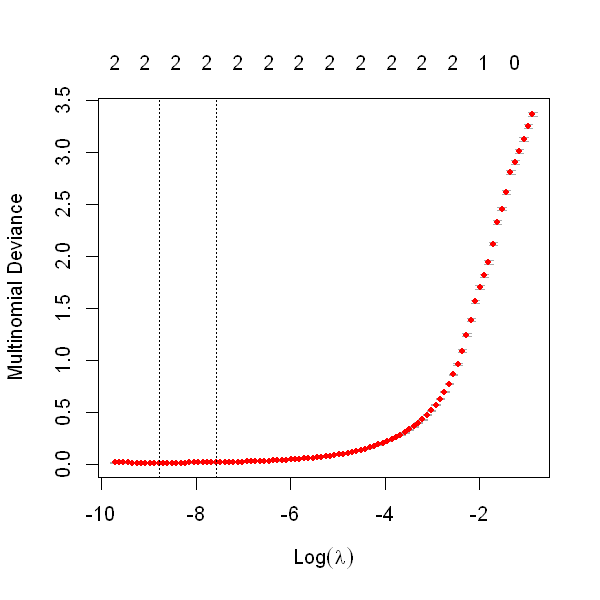

In [49]:
new_train_encoded<-as.matrix(Dataset_4_train_encoded[,-c(35:44)])
new_test_encoded<-as.matrix(Dataset_4_test_encoded[,-c(35:44)])
cross_validation<-cv.glmnet(new_train_encoded,as.matrix(Dataset_4_train$Species),family="multinomial",alpha=1)
options(repr.plot.width=5, repr.plot.height=5)
plot(cross_validation)

In [50]:
print(c("The best lambda value: ", cross_validation$lambda.min))

[1] "The best lambda value: " "0.000152597076006422"   


- **The best lambda value is found as 0.000152597076006422.**

In [57]:
# prediction for train data
predictions <- predict(cross_validation, new_train_encoded, s='lambda.min',type='class')
# summarize accuracy for train data
tab<-table(predictions,Dataset_4_train$Species)
print("confusion matrix for the train data:")
print(tab)

[1] "confusion matrix for the train data:"
                        
predictions              AdenomeraAndre AdenomeraHylaedactylus
  AdenomeraAndre                    499                      0
  AdenomeraHylaedactylus              0                   2609
  Ameeregatrivittata                  0                      0
  HylaMinuta                          0                      0
  HypsiboasCinerascens                0                      0
  HypsiboasCordobae                   0                      0
  LeptodactylusFuscus                 0                      0
  OsteocephalusOophagus               0                      0
  Rhinellagranulosa                   0                      0
  ScinaxRuber                         0                      0
                        
predictions              Ameeregatrivittata HylaMinuta HypsiboasCinerascens
  AdenomeraAndre                          0          0                    0
  AdenomeraHylaedactylus                  0          0        

In [58]:
train_error<-1-sum(diag(tab)/sum(tab))
print(c("train error:",train_error))

[1] "train error:"         "0.000370644922164542"


In [59]:
# prediction for test data
predictions <- predict(cross_validation, new_test_encoded, s='lambda.min',type='class')
# summarize accuracy for train data
tab<-table(predictions,Dataset_4_test$Species)
print("confusion matrix for the test data:")
print(tab)

[1] "confusion matrix for the test data:"
                        
predictions              AdenomeraAndre AdenomeraHylaedactylus
  AdenomeraAndre                    173                      0
  AdenomeraHylaedactylus              0                    869
  Ameeregatrivittata                  0                      0
  HylaMinuta                          0                      0
  HypsiboasCinerascens                0                      0
  HypsiboasCordobae                   0                      0
  LeptodactylusFuscus                 0                      0
  OsteocephalusOophagus               0                      0
  Rhinellagranulosa                   0                      0
  ScinaxRuber                         0                      0
                        
predictions              Ameeregatrivittata HylaMinuta HypsiboasCinerascens
  AdenomeraAndre                          0          0                    0
  AdenomeraHylaedactylus                  0          0         

In [60]:
test_error<-1-sum(diag(tab)/sum(tab))
print(c("test error:",test_error))

[1] "test error:"          "0.000555864369093939"


- Penalized regression with lasso penalty gives **train error of 0.0003706** and **test error of 0.0005559** which show that predictions are very good for this data set.

## Decision Tree

In decision tree approach, for **the minimal number of observations per tree leaf** 2,3,4 and 5 are used; for **the complexity parameter** 0.005, 0.01, 0.015 and 0.02 are used.

In [61]:
require(rpart)
require(rattle)

Loading required package: rpart
Warning message:
"package 'rpart' was built under R version 3.6.3"Loading required package: rattle
Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Warning message:
"package 'tibble' was built under R version 3.6.3"Loading required package: bitops
Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [65]:
set.seed(154)

# function for building a decision tree with different parameters of the minimal number of observations per tree leaf and 
# the complexity parameter

decision_tree <- function(i) {
    dtree1<-rpart(Species~.,data = Dataset_4_train,control = rpart.control(minbucket = 1+i,cp=0.005*i))
    a<-as.data.frame(printcp(dtree1))

    # prediction
    predict(dtree1,Dataset_4_test)
    
    # misclassification error for train data
    tab1_train<-table(predict(dtree1,Dataset_4_train, type="class"),Dataset_4_train$Species)
    print(tab1_train)
    error1_train<-1-sum(diag(tab1_train)/sum(tab1_train))
    print(c("train error:",error1_train)) 
  
    # misclassification error for test data
    tab1_test<-table(predict(dtree1,Dataset_4_test, type="class"),Dataset_4_test$Species)
    error1_test<-1-sum(diag(tab1_test)/sum(tab1_test))
    print(c("test error:",error1_test))
    
    options(repr.plot.width=4, repr.plot.height=4)
    plotcp(dtree1)
    return(c(error1_train,error1_test))
}

In [66]:
train_err <- list()
test_err <- list()


Classification tree:
rpart(formula = Species ~ ., data = Dataset_4_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] Family   Genus    MFCCs_10 MFCCs_13 MFCCs_15 MFCCs_17 MFCCs_22

Root node error: 2787/5396 = 0.51649

n= 5396 

          CP nsplit rel error   xerror      xstd
1  0.2418371      0 1.0000000 1.000000 0.0131714
2  0.1607463      1 0.7581629 0.758881 0.0128672
3  0.1370649      2 0.5974166 0.599211 0.0121845
4  0.1162540      3 0.4603516 0.462504 0.0112387
5  0.0753498      4 0.3440976 0.346250 0.0101005
6  0.0681737      5 0.2687478 0.270901 0.0091434
7  0.0376749      6 0.2005741 0.203445 0.0080825
8  0.0333692      7 0.1628992 0.164334 0.0073457
9  0.0301399      8 0.1295300 0.144959 0.0069367
10 0.0272695      9 0.0993900 0.103696 0.0059342
11 0.0204521     10 0.0721206 0.082885 0.0053354
12 0.0182992     11 0.0516685 0.055615 0.0044025
13 0.0111231     12 0.0333692 0.036598 0.0035894
14 0.007893

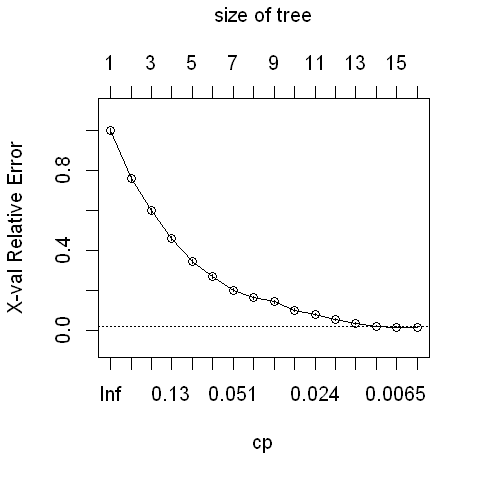

In [67]:
err = decision_tree(1)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])


Classification tree:
rpart(formula = Species ~ ., data = Dataset_4_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] Family   Genus    MFCCs_10 MFCCs_13 MFCCs_15 MFCCs_22

Root node error: 2787/5396 = 0.51649

n= 5396 

         CP nsplit rel error   xerror      xstd
1  0.241837      0  1.000000 1.000000 0.0131714
2  0.160746      1  0.758163 0.759957 0.0128705
3  0.137065      2  0.597417 0.600287 0.0121905
4  0.116254      3  0.460352 0.463940 0.0112506
5  0.075350      4  0.344098 0.347686 0.0101168
6  0.068174      5  0.268748 0.272336 0.0091636
7  0.037675      6  0.200574 0.204162 0.0080951
8  0.033369      7  0.162899 0.174022 0.0075385
9  0.030140      8  0.129530 0.149623 0.0070383
10 0.027269      9  0.099390 0.106925 0.0060205
11 0.020452     10  0.072121 0.075709 0.0051091
12 0.018299     11  0.051668 0.057409 0.0044708
13 0.011123     12  0.033369 0.035881 0.0035547
14 0.010000     13  0.022246 0.028

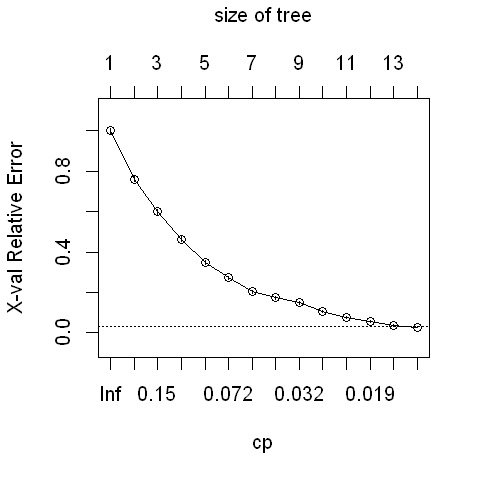

In [68]:
err = decision_tree(2)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])


Classification tree:
rpart(formula = Species ~ ., data = Dataset_4_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] Family   Genus    MFCCs_10 MFCCs_13 MFCCs_15 MFCCs_22

Root node error: 2787/5396 = 0.51649

n= 5396 

         CP nsplit rel error   xerror      xstd
1  0.241837      0  1.000000 1.000000 0.0131714
2  0.160746      1  0.758163 0.759239 0.0128683
3  0.137065      2  0.597417 0.598852 0.0121825
4  0.116254      3  0.460352 0.462146 0.0112357
5  0.075350      4  0.344098 0.345892 0.0100964
6  0.068174      5  0.268748 0.263007 0.0090305
7  0.037675      6  0.200574 0.202368 0.0080636
8  0.033369      7  0.162899 0.163617 0.0073312
9  0.030140      8  0.129530 0.143882 0.0069130
10 0.027269      9  0.099390 0.107643 0.0060395
11 0.020452     10  0.072121 0.074991 0.0050858
12 0.018299     11  0.051668 0.053104 0.0043048
13 0.015000     12  0.033369 0.035881 0.0035547
                        
         

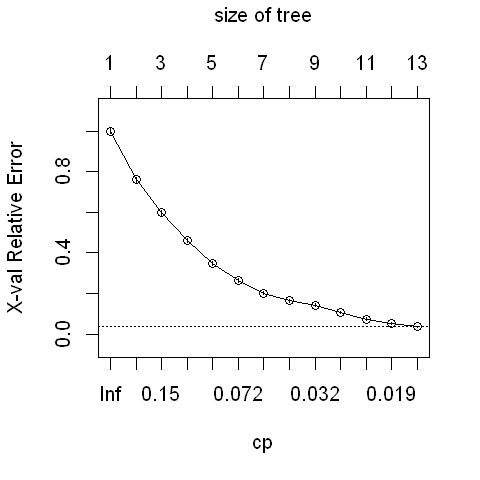

In [69]:
err = decision_tree(3)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])


Classification tree:
rpart(formula = Species ~ ., data = Dataset_4_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] Family   Genus    MFCCs_10 MFCCs_13 MFCCs_22

Root node error: 2787/5396 = 0.51649

n= 5396 

         CP nsplit rel error   xerror      xstd
1  0.241837      0  1.000000 1.000000 0.0131714
2  0.160746      1  0.758163 0.759598 0.0128694
3  0.137065      2  0.597417 0.599928 0.0121885
4  0.116254      3  0.460352 0.463581 0.0112477
5  0.075350      4  0.344098 0.347327 0.0101127
6  0.068174      5  0.268748 0.271977 0.0091586
7  0.037675      6  0.200574 0.203803 0.0080888
8  0.033369      7  0.162899 0.166128 0.0073820
9  0.030140      8  0.129530 0.138141 0.0067845
10 0.027269      9  0.099390 0.098314 0.0057866
11 0.020452     10  0.072121 0.075709 0.0051091
12 0.020000     11  0.051668 0.063868 0.0047075
                        
                         AdenomeraAndre AdenomeraHylaedactylus
  A

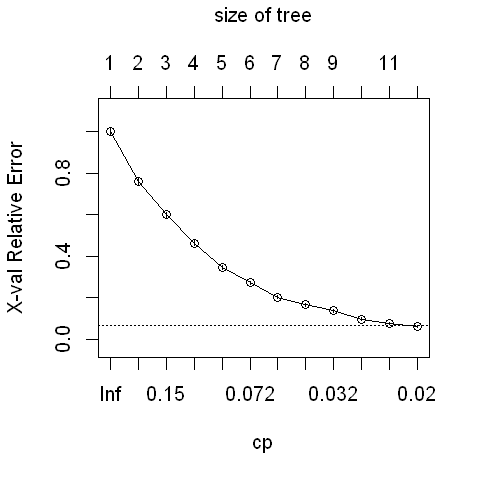

In [70]:
err = decision_tree(4)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])

In [71]:
train_err

[[1]]
[1] 0.004633062

[[2]]
[1] 0.01148999

[[3]]
[1] 0.01723499

[[4]]
[1] 0.02668643

In [72]:
test_err 

[[1]]
[1] 0.00889383

[[2]]
[1] 0.01334074

[[3]]
[1] 0.02167871

[[4]]
[1] 0.02723735

- For both train and test data the decision tree with **the minimal number of observations per tree leaf as 2** and **the complexity parameter as 0.0005** has a better performance when compared with train and test errors.

## Random Forest

In random forest approach, J trees are fit to bootstrap samples using a random sample of m features on which to split each
node. I used (12,14,16,18,20) as m in each iteration to find the best value.

In [76]:
require(randomForest)
library(cowplot)

Loading required package: randomForest
Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

Warning message:
"package 'cowplot' was built under R version 3.6.3"

In [77]:
set.seed(105)

random_forest <- function(i){
    model<-randomForest(Species~.,data=Dataset_4_train,proximity=TRUE,mtry=10+2*i)
    print(model)
    
    # misclassification error for train data
    tab1_train<-table(predict(model,Dataset_4_train, type="class"),Dataset_4_train$Species)
    print(tab1_train)
    error1_train<-1-sum(diag(tab1_train)/sum(tab1_train))
    print(c("train error:",error1_train)) 
  
    # misclassification error for test data
    tab1_test<-table(predict(model,Dataset_4_test, type="class"),Dataset_4_test$Species)
    error1_test<-1-sum(diag(tab1_test)/sum(tab1_test))
    print(c("test error:",error1_test))
    
    return(error1_test)
}

In [78]:
err <- list()

In [79]:
e = random_forest(1)
err = append(err,e)


Call:
 randomForest(formula = Species ~ ., data = Dataset_4_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 0.22%
Confusion matrix:
                       AdenomeraAndre AdenomeraHylaedactylus Ameeregatrivittata
AdenomeraAndre                    499                      0                  0
AdenomeraHylaedactylus              3                   2606                  0
Ameeregatrivittata                  0                      0                404
HylaMinuta                          0                      0                  0
HypsiboasCinerascens                0                      0                  0
HypsiboasCordobae                   0                      0                  0
LeptodactylusFuscus                 0                      0                  0
OsteocephalusOophagus               0              

In [80]:
e = random_forest(2)
err = append(err,e)


Call:
 randomForest(formula = Species ~ ., data = Dataset_4_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 14

        OOB estimate of  error rate: 0.28%
Confusion matrix:
                       AdenomeraAndre AdenomeraHylaedactylus Ameeregatrivittata
AdenomeraAndre                    499                      0                  0
AdenomeraHylaedactylus              3                   2606                  0
Ameeregatrivittata                  0                      0                404
HylaMinuta                          0                      0                  0
HypsiboasCinerascens                0                      0                  0
HypsiboasCordobae                   0                      0                  0
LeptodactylusFuscus                 0                      0                  0
OsteocephalusOophagus               0              

In [81]:
e = random_forest(3)
err = append(err,e)


Call:
 randomForest(formula = Species ~ ., data = Dataset_4_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 16

        OOB estimate of  error rate: 0.28%
Confusion matrix:
                       AdenomeraAndre AdenomeraHylaedactylus Ameeregatrivittata
AdenomeraAndre                    499                      0                  0
AdenomeraHylaedactylus              3                   2606                  0
Ameeregatrivittata                  0                      0                404
HylaMinuta                          0                      0                  0
HypsiboasCinerascens                0                      0                  0
HypsiboasCordobae                   0                      0                  0
LeptodactylusFuscus                 0                      0                  0
OsteocephalusOophagus               0              

In [82]:
e = random_forest(4)
err = append(err,e)


Call:
 randomForest(formula = Species ~ ., data = Dataset_4_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 18

        OOB estimate of  error rate: 0.28%
Confusion matrix:
                       AdenomeraAndre AdenomeraHylaedactylus Ameeregatrivittata
AdenomeraAndre                    499                      0                  0
AdenomeraHylaedactylus              3                   2606                  0
Ameeregatrivittata                  0                      0                404
HylaMinuta                          0                      0                  0
HypsiboasCinerascens                0                      0                  0
HypsiboasCordobae                   0                      0                  0
LeptodactylusFuscus                 0                      0                  0
OsteocephalusOophagus               0              

In [83]:
e = random_forest(5)
err = append(err,e)


Call:
 randomForest(formula = Species ~ ., data = Dataset_4_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 20

        OOB estimate of  error rate: 0.32%
Confusion matrix:
                       AdenomeraAndre AdenomeraHylaedactylus Ameeregatrivittata
AdenomeraAndre                    499                      0                  0
AdenomeraHylaedactylus              3                   2606                  0
Ameeregatrivittata                  0                      0                404
HylaMinuta                          0                      0                  0
HypsiboasCinerascens                0                      0                  0
HypsiboasCordobae                   0                      0                  0
LeptodactylusFuscus                 0                      0                  0
OsteocephalusOophagus               0              

In [84]:
err

[[1]]
[1] 0.001667593

[[2]]
[1] 0.001667593

[[3]]
[1] 0.002223457

[[4]]
[1] 0.002223457

[[5]]
[1] 0.002779322

- Comparing the test error rates, the best model is found with m=12 or m=14 which have the same test error rate.

- With the best decision tree, test error is 0.00889 and in this approach with the best model, test error is 0.00167. Thus, random forest performs better than decision tree for this data.

## Stochastic Gradient Boosting (SGB)

In [86]:
library(caret)
require(gbm)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


Warning message:
"Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk."

,var,rel.inf
Genus,Genus,44.315258148
MFCCs_22,MFCCs_22,20.138760685
MFCCs_12,MFCCs_12,7.784400202
MFCCs_13,MFCCs_13,7.540980230
MFCCs_11,MFCCs_11,7.536876595
MFCCs_15,MFCCs_15,5.091766022
Family,Family,4.758662654
MFCCs_.9,MFCCs_.9,0.627822758
MFCCs_.2,MFCCs_.2,0.555884906
MFCCs_.8,MFCCs_.8,0.354581366


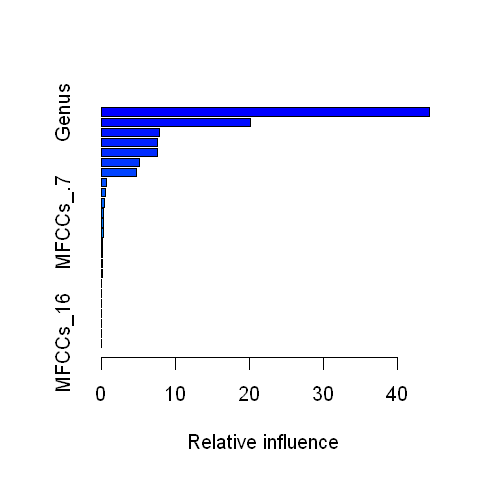

In [87]:
set.seed(123)
gbm_tree<-gbm(Species~.,data = Dataset_4_train,distribution="multinomial")
summary(gbm_tree)

In [88]:
p1<-as.data.frame(predict(gbm_tree,type = "response",n.trees = 100))
predictions<-as.data.frame(matrix(nrow = nrow(Dataset_4_train),ncol = 1))
for (i in 1:nrow(predictions)){
  if (max(p1[i,])==p1[i,1]) {predictions[i,1]="AdenomeraAndre"
  }
  else if (max(p1[i,])==p1[i,2]) {predictions[i,1]="AdenomeraHylaedactylus"
  }
  else if (max(p1[i,])==p1[i,3]) {predictions[i,1]="Ameeregatrivittata"
  }
  else if (max(p1[i,])==p1[i,4]) {predictions[i,1]="HylaMinuta"
  }
  else if (max(p1[i,])==p1[i,5]) {predictions[i,1]="HypsiboasCinerascens"
  }
  else if (max(p1[i,])==p1[i,6]) {predictions[i,1]="HypsiboasCordobae"
  }
  else if (max(p1[i,])==p1[i,7]) {predictions[i,1]="LeptodactylusFuscus"
  }
  else if (max(p1[i,])==p1[i,8]) {predictions[i,1]="OsteocephalusOophagus"
  }
  else if (max(p1[i,])==p1[i,9]) {predictions[i,1]="Rhinellagranulosa"
  }
  else {predictions[i,1]="ScinaxRuber"
  }
}

In [89]:
tab<-table(predictions[,1],Dataset_4_train$Species)
print("confusion matrix for train data:")
tab
train_error<-1-sum(diag(tab)/sum(tab))
print(c("train error:",train_error))

[1] "confusion matrix for train data:"


                        
                         AdenomeraAndre AdenomeraHylaedactylus
  AdenomeraAndre                    498                      0
  AdenomeraHylaedactylus              0                   2609
  Ameeregatrivittata                  0                      0
  HylaMinuta                          0                      0
  HypsiboasCinerascens                1                      0
  HypsiboasCordobae                   0                      0
  LeptodactylusFuscus                 0                      0
  OsteocephalusOophagus               0                      0
  Rhinellagranulosa                   0                      0
  ScinaxRuber                         0                      0
                        
                         Ameeregatrivittata HylaMinuta HypsiboasCinerascens
  AdenomeraAndre                          0          0                    0
  AdenomeraHylaedactylus                  0          0                    0
  Ameeregatrivittata         

[1] "train error:"        "0.00111193476649374"


In [90]:
p1<-as.data.frame(predict(gbm_tree,Dataset_4_test, type = "response",n.trees = 100))
predictions<-as.data.frame(matrix(nrow = nrow(Dataset_4_test),ncol = 1))
for (i in 1:nrow(predictions)){
  if (max(p1[i,])==p1[i,1]) {predictions[i,1]="AdenomeraAndre"
  }
  else if (max(p1[i,])==p1[i,2]) {predictions[i,1]="AdenomeraHylaedactylus"
  }
  else if (max(p1[i,])==p1[i,3]) {predictions[i,1]="Ameeregatrivittata"
  }
  else if (max(p1[i,])==p1[i,4]) {predictions[i,1]="HylaMinuta"
  }
  else if (max(p1[i,])==p1[i,5]) {predictions[i,1]="HypsiboasCinerascens"
  }
  else if (max(p1[i,])==p1[i,6]) {predictions[i,1]="HypsiboasCordobae"
  }
  else if (max(p1[i,])==p1[i,7]) {predictions[i,1]="LeptodactylusFuscus"
  }
  else if (max(p1[i,])==p1[i,8]) {predictions[i,1]="OsteocephalusOophagus"
  }
  else if (max(p1[i,])==p1[i,9]) {predictions[i,1]="Rhinellagranulosa"
  }
  else {predictions[i,1]="ScinaxRuber"
  }
}

In [91]:
tab<-table(predictions[,1],Dataset_4_test$Species)
print("confusion matrix for the test data:")
tab
test_error<-1-sum(diag(tab)/sum(tab))
print(c("test error:",test_error))

[1] "confusion matrix for the test data:"


                        
                         AdenomeraAndre AdenomeraHylaedactylus
  AdenomeraAndre                    173                      0
  AdenomeraHylaedactylus              0                    868
  Ameeregatrivittata                  0                      0
  HylaMinuta                          0                      0
  HypsiboasCinerascens                0                      1
  HypsiboasCordobae                   0                      0
  LeptodactylusFuscus                 0                      0
  OsteocephalusOophagus               0                      0
  Rhinellagranulosa                   0                      0
  ScinaxRuber                         0                      0
                        
                         Ameeregatrivittata HylaMinuta HypsiboasCinerascens
  AdenomeraAndre                          0          0                    0
  AdenomeraHylaedactylus                  0          0                    0
  Ameeregatrivittata         

[1] "test error:"         "0.00166759310728182"


- Test error rates for the best model of each approach are given below:

| Penalized Regression | Decision Tree | Random Forest | Stochastic Gradient Boosting |
| --- | --- | --- | --- |
| 0.000556 | 0.008893 | 0.001668 | 0.001668 |


- According to these values, we can say that **penalized regression model** performs better compared to other models.